# Clustering

in this tutorial clustering will be explained


## content of the tutorial:

1. Introduction Kmeans
    * What is Kmeans clustering?
    * When can you apply it?
2. Step by step Kmeans
    * Import the data
    * Standardization
    * placing cluster points/centroids 
    * Assigning points to clusters
    * update centroid location
    * Assign points
    * repeat 
    * plot the endresult
    * determine which number of K is best

## introduction

### what is Kmeans clustering
Kmeans is a very much used algorithm because its very easy to implement and is very efficient computationally speaking. Those are the reasons that this algorithm is used so often. However there are also some problems and shortcomings like the algorithm struggles with detecting non spherical clusters. Since it uses the distance to determine how similar points are to eachother and if they belong to the same cluster or not.


### when can you apply Kmeans
Kmeans clustering can be applied with a lot of different types of datasets,for example to see what interests customers have. Kmeans is also applied as a benchmark when testing other clustering methods to see if more advanced algorithms actually are an improvement.


## step by step Kmeans 


Here will follow a step by step tutorial where you can make a simple Kmeans program for a small dataset. Here we skip the normalization part of the Kmeans algorithm since you learned this in the pandas tutorial.

### step 1
First of all we start by importing the libraries we will need, Pandas for the dataset, numpy for some mathamatical functions and matplotlib.pyplot for plotting the results we get.
 
**Excercise 1**
Import the libraries. `hint` use the short combinations you learned before to make it easier for youself.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Step 2
You will practice your skills on the following small dataset. It's small so you can see all the steps in the process. 
Run the next cell to get your data. Note that the data is called `df`

In [3]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72, 72, 70, 79, 68, 65],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 42, 45, 62, 55, 59]
})

### Step 3 

now you pick the number of clusters you want. In this tutorial we start with 3 clusters, so `k = 3` that you have to place at random. To make sure it's random but you do not get different results every time you run the code we use a function of numpy called `np.random.seed()` this makes sure that you generate a random number but that this number does not change when running the code multiple times. 

**Excercise 2**
Complete the code in the next cell:
you should add the code to get a random position in the data set.
the range of the data is `[0 80]`
`hint` you need to ad 2 coordinates 


In [ ]:
np.random.seed(200) # makes sure that a random number stays the same each time you run

k = 3
centroids = {
    i+1 : [ #your code to make 3 random centroids]
    for i in #in what?
    
}


Now that you have done this you can plot the data and the centroids together in a figure. To do this you should complete the following lines of code that are given in the excersise. It is smart to plot the data and centroids in a different color so that you can clearly see the difference.

**Excercise 3**
Complete the following code:<br>
`hint` look in the documentation on how some thing work if you can't remember
`hint` a colormap is a library with values 1 to x and a string where you put the color letter or code

In [8]:
fig = plt.figure(figsize=(5, 5)) # this is so the figure has a normal size
plt.scatter(#code...)
colmap = {#code...}#
for i in centroids.keys():
    plt.scatter(*centroids[i], color = #code )
                
#code to make it visible


SyntaxError: invalid syntax (<ipython-input-8-a61e5379fa30>, line 4)

If you were succesfull you can plot your results and it should look like this:
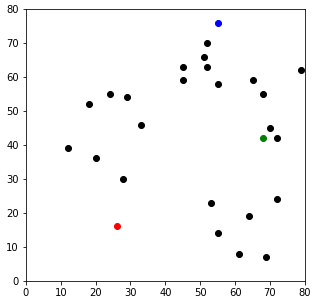  

### step 4 
Now it is time to assign the datapoints to a cluster. You do this by calculating the distance from each point to the centroids and adding that information to the DataFrame df. 

**excersice 4** <br>
build a function called assignment, where you calculate the distance and after that is done you add 2 other columns one for the closest cluster and the other for the color that point should have. The color is purely to visualize the results. 

After you build this function check if it worked by printing the head of the DataFrame


In [ ]:
def assignment(df,centroids):
    for i in centroids.keys():
        # calculate the distance
        df[str(i)] = # calculate the distance
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = #your code
    
    df['color'] = 
    return df

df = assignment(df,centroids)


**Excercise 5**

Plot the newly assigned points and the clusters together in a plot.<br>
`hint` make the datapoints distictive, for tips look at alpha on this [site](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)


It should look somewhat like:<br> 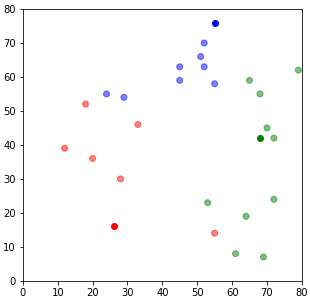

### Step 5

as you can see the clusters and centroids are not very good at this point everything is assigned but you can imagine that the red point in the bottom right corner should be green.
Now it is time to update the centroids that were chosen and placed at random. 
to do this build a funcion called update where you relocate the centroid to the middle of the cluster they belong to.

**Excercise 6**
<br>
Make the function update where you place the centroids in the centre of the cluster. First think about what the centre of the cluster is and how you can calculate this position.

Once you build your function call it and check your result by plotting the data as you have done in excercise 5.

In [ ]:
def update(data):
    #your code
    
    
    return data
#code to actually update


Now your updated centroids you should look like this image: 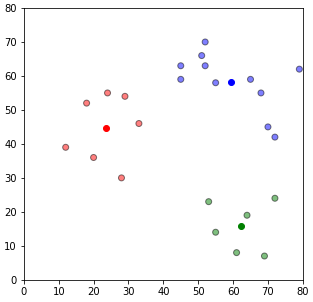


### step 6
This method is very time consuming so the next excersize is to build a program in spyder or in the cell below that does this all without you having to update en assign the points every time. You should use the code from the steps you already passed to build this program. the result should be precisely the same.

In [ ]:
#build your program here or in spyder

### Step 7 

Now you used 3 clusters but as you can see it would probably be better if there were more clusters. 
But how do you determine the best number of clusters if you don't know the answer beforehand?
This is always a problem in clustering and the sollution we are going to introduce is the mean silhouette score.
Each point has it's own silhouette score, this is a score that determines how well the point is assigned to the cluster it belongs to compared to the closest other cluster. This is done by calculating the following formulas
$$ 
a(i)={\frac {1}{|C_{i}|-1}}\sum _{j\in C_{i},i\neq j}d(i,j)$$

$$
b(i)=\min _{k\neq i}{\frac {1}{|C_{k}|}}\sum _{j\in C_{k}}d(i,j)$$

$$
s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}$$

so in words if point X belongs to cluster 1 and cluster 2 is the closest cluster the silhouette score is calculated by determining the mean distance between all points in cluster 1 and point X. we call this a. and also the mean distance of the point to all points in cluster 2, we call this b. To calculate the silhouette score for point A you subtract y from x and devide by the maximum value of either x or y.

the score is determined for all points and then the mean score is calculated and stored.
you do this for multiple numbers of k starting from 2. When you have this the number of clusters with the highest score is the number of clusters you should use.

An important thing to remember for this example is that the DataFrame is small. so here it is highly influenced by the initial location of the cluster points. for larger datasets this problem is less prominent

Now implement this in you program so that you can pick the most optimal K. you may use the implemented silhouette score from sklearn.


In [ ]:
from sklearn.metrics import  silhouette_score

clusterrange = #your code

#loop over all k and calculate the sillhouette score using silhouette_score(coordinates of the points, list of the cluster the points belong to)


#next plot the scores and see if you get the same as shown below

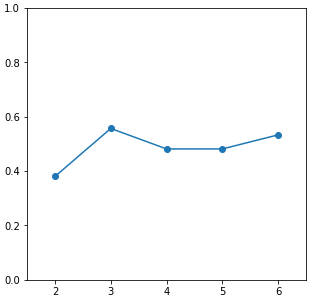